In [49]:
import sys
sys.path.insert(0, '/Users/Soren/Documents/GitHub/sniffing-sensor')

seed = 42

In [50]:
from data.datasets import PureCompoundsInTallCuvettes
from data.sniffing_datasets import AlkanesShortSniff
from data.data_functions import DataLoader, PhaseTransform, DerivTransform, NormalizeTransform, NormalizePhaseTransform, SNIFFING_PATH

In [51]:
liq_phase, liq_labels = DataLoader(PureCompoundsInTallCuvettes(), transforms=[PhaseTransform, NormalizePhaseTransform]).load()
liq_derivs, _ = DataLoader(PureCompoundsInTallCuvettes(), transforms=[DerivTransform, NormalizeTransform]).load()
gas_phase, gas_labels = DataLoader(AlkanesShortSniff(), transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH).load()
gas_derivs, _ = DataLoader(AlkanesShortSniff(), transforms=[DerivTransform, NormalizeTransform], folder=SNIFFING_PATH).load()

Loading experimental data
Pentane (1/11): [===================0] 100% complete
Hexane (2/11): [===================0] 100% complete


KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

labelsize = 8
legendsize = 8
ticksize = 8

def plot_array_data(exp_set, input_data, xlim, ylim=None, color_dict = None, legend=True, ax=None, linewidth = None, linestyle = '-', label = True):
    if ax == None:
        _, ax = plt.subplots()
        
    for chem in exp_set:    
        nums = exp_set[chem]
        data = pd.DataFrame([input_data[n] for n in nums])

        # calculate average
        avg = data.mean()
        std = data.std()
        
        try:
            ax.plot(np.linspace(xlim[0],xlim[1],len(avg)),avg, label = chem, linestyle = linestyle, linewidth = linewidth, color = color_dict[chem])
            ax.fill_between(np.linspace(xlim[0],xlim[1],len(avg)),np.array(avg) - np.array(std),np.array(avg) + np.array(std), color = color_dict[chem], alpha=0.1)
        except:
            ax.plot(np.linspace(xlim[0],xlim[1],len(avg)),avg, label = chem, color = None)
            ax.fill_between(np.linspace(xlim[0],xlim[1],len(avg)),np.array(avg) - np.array(std),np.array(avg) + np.array(std), alpha=0.1)
        if legend:
            if len(exp_set) > 8:
                ax.legend(loc='upper right', bbox_to_anchor=(1.015, 1.02), ncol=2, frameon=False, shadow=False, fontsize=legendsize)
            else:
                ax.legend(loc='upper right', bbox_to_anchor=(1.015, 1.02), ncol=1, frameon=False, shadow=False, fontsize=legendsize)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    if label == True:
        if xlim[0] == 0:
            ax.set_xlabel("Time (s)", fontsize=labelsize);
            ax.set_ylabel("Phase derivative (a.u.)", fontsize=labelsize)
        else:
            ax.set_xlabel("Wavelength (nm)", fontsize=labelsize)
            ax.set_ylabel("$\Delta I$ (a.u.)", fontsize=labelsize)
        ax.tick_params(labelsize=ticksize)
    else:
        ax.set_xticks = []

/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_20601/3942369638.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])


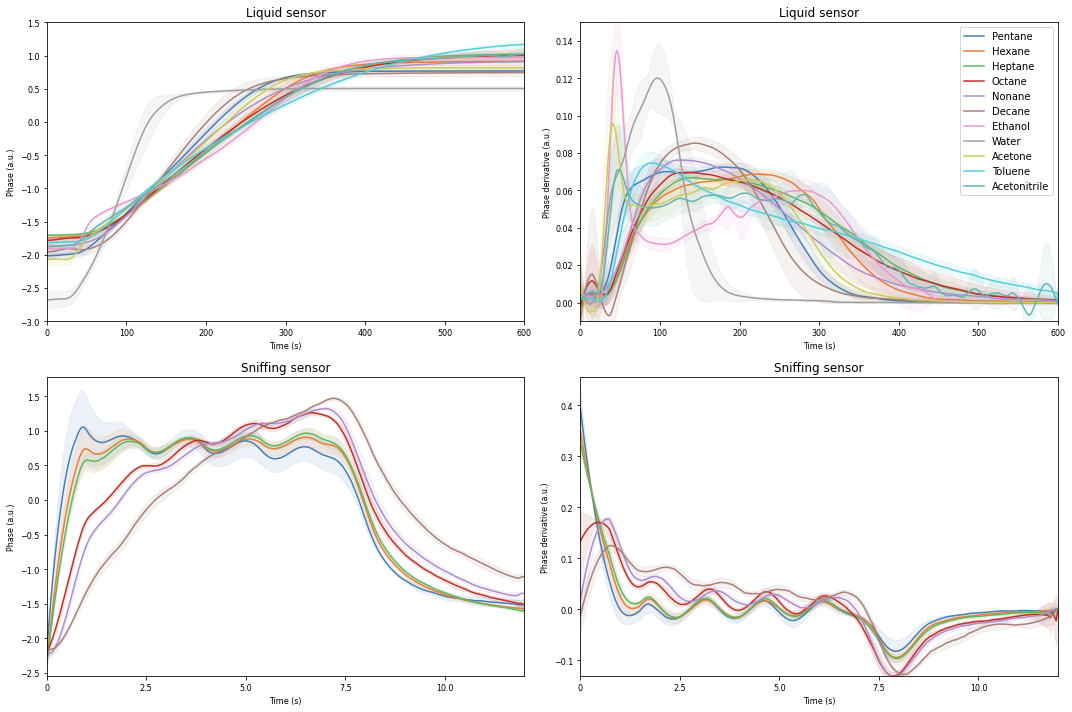

In [ ]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(2,2, figsize=(15,10))


plot_array_data(PureCompoundsInTallCuvettes(), liq_phase, [0,600], ylim=[-3,1.5], color_dict = color_dict, ax=axes[0][0])
plot_array_data(PureCompoundsInTallCuvettes(), liq_derivs, [0,600], ylim=[-0.01,0.15], color_dict = color_dict, ax=axes[0][1])
plot_array_data(AlkanesShortSniff(), gas_phase, [0,240], color_dict = color_dict, ax=axes[1][0])
plot_array_data(AlkanesShortSniff(), gas_derivs, [0,240], color_dict = color_dict, ax=axes[1][1])

for ax in [axes[0][0], axes[0][1]]:
    ax.set_title('Liquid sensor')
for ax in [axes[1][0], axes[1][1]]:
    ax.set_title('Sniffing sensor')
    ax.set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])
for ax in [axes[0][0], axes[1][0]]:
    ax.set_ylabel("Phase (a.u.)", fontsize=labelsize)
for ax in axes.flatten():
    try:
        ax.get_legend().remove()
    except AttributeError:
        pass
axes[0][1].legend()

plt.tight_layout()

# # A-i: plot phase derivatives
# subset = OrderedDict(exp_set.items()[0:6])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.005], color_dict = color_dict, ax=ax['A1'])
# subset = OrderedDict(exp_set.items()[6:-2] + [exp_set.items()[-1]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = ':', linewidth = 2.5)
# subset = OrderedDict([exp_set.items()[-2]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = '--', linewidth = 2)
# #plot_array_data(exp_set, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A'])
# ax['A1'].legend(loc='upper right', bbox_to_anchor=(1.015, 1.02), ncol=2, frameon=False, shadow=False, fontsize=legendsize*0.9)

### Experiment to proof sniffing

In [ ]:
gas_phase_cut = {k: NormalizePhaseTransform.transform(v[:20]) for k, v in gas_phase.items()}

/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_20601/289669990.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])
/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_20601/289669990.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(np.linspace(0,1, len(axes[1].get_xticklabels())))


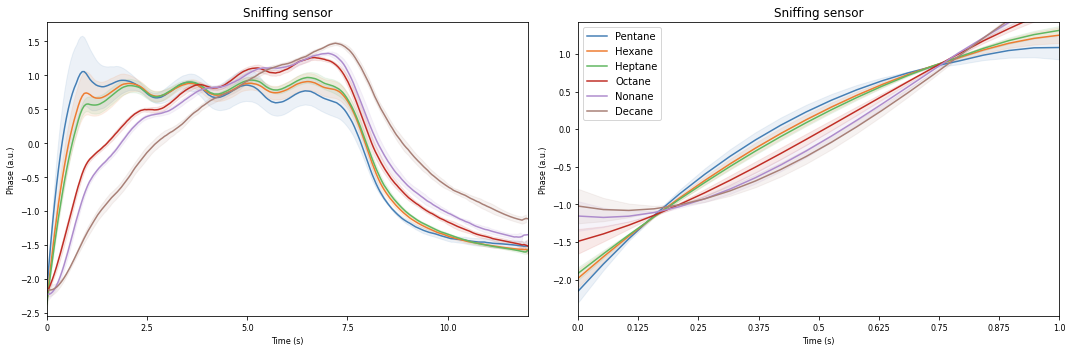

In [ ]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data(AlkanesShortSniff(), gas_phase, [0,240], color_dict = color_dict, ax=axes[0])
axes[0].set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])
plot_array_data(AlkanesShortSniff(), gas_phase_cut, [0,20], color_dict = color_dict, ax=axes[1])
axes[1].set_xticklabels(np.linspace(0,1, len(axes[1].get_xticklabels())))

for ax in [axes[0], axes[1]]:
    ax.set_title('Sniffing sensor')
# for ax in [axes[1][0], axes[1][1]]:
#     pass #ax.set_title('Sniffing sensor')
for ax in [axes[0], axes[1]]:
    ax.set_ylabel("Phase (a.u.)", fontsize=labelsize)
for ax in axes.flatten():
    try:
        ax.get_legend().remove()
    except AttributeError:
        pass
axes[1].legend()

plt.tight_layout()

# # A-i: plot phase derivatives
# subset = OrderedDict(exp_set.items()[0:6])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.005], color_dict = color_dict, ax=ax['A1'])
# subset = OrderedDict(exp_set.items()[6:-2] + [exp_set.items()[-1]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = ':', linewidth = 2.5)
# subset = OrderedDict([exp_set.items()[-2]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = '--', linewidth = 2)
# #plot_array_data(exp_set, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A'])
# ax['A1'].legend(loc='upper right', bbox_to_anchor=(1.015, 1.02), ncol=2, frameon=False, shadow=False, fontsize=legendsize*0.9)

Conversation with Victoria:
- include second plot in suplement to make argument that dynamics (without absolute measurement) are important and sniffing is an improvement
  - arbitrary units only matter with sniffing
  - improves performance relative to noise
- Could quantify by comparing level of distance in hyperspace relative to noise (scale level) which would examplify how cleanly the datasets can be separated from one another

## Playground

In [ ]:
gas_phase[193][0]

15.617833100641148

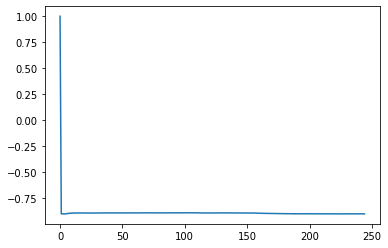

In [ ]:
data = pd.read_csv(SNIFFING_PATH.joinpath('193.csv'))
data_spectra = (data.values[500:1200, 1:] - np.min(data.values[500:1200, 1:])).transpose()

ft_data = np.fft.fft(data_spectra)
# Step 2: Calculates the phase
R = np.real(ft_data[:, 1])
I = np.imag(ft_data[:, 1])
phi = I / (R**2 + I**2) ** 0.5
#phi = phi/np.sqrt(np.sum(phi**2))

plt.plot(phi)

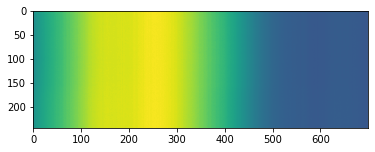

In [ ]:
plt.imshow(data_spectra)

245


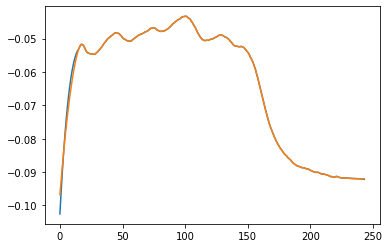

In [ ]:
from scipy.signal import savgol_filter as sgf

print(len(gas_phase[193]))
plt.plot(sgf(gas_phase[193][1:], window_length=31, polyorder=3))
plt.plot(sgf(gas_phase[193][1:], window_length=31, polyorder=2))
#plt.plot([0]+gas_phase[193][1:])

244


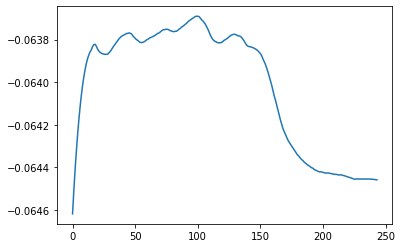

In [ ]:
df = pd.read_csv(SNIFFING_PATH.joinpath('Phase', '193.csv'))
print(len(df["0"]))
plt.plot(df["0"])

In [ ]:
for i,v in gas_phase.items():
    print(i, v.shape)

184 (244,)
187 (243,)
190 (244,)
193 (245,)
196 (244,)
199 (245,)
202 (245,)
205 (243,)
183 (244,)
186 (244,)
189 (243,)
192 (244,)
195 (245,)
198 (244,)
201 (245,)
204 (244,)
207 (245,)
182 (244,)
185 (245,)
188 (244,)
191 (244,)
194 (243,)
197 (244,)
200 (244,)
203 (245,)
206 (245,)
212 (244,)
215 (247,)
218 (244,)
221 (242,)
224 (245,)
227 (244,)
230 (244,)
233 (242,)
236 (244,)
239 (247,)
213 (242,)
216 (246,)
219 (249,)
222 (242,)
225 (246,)
228 (245,)
231 (244,)
234 (246,)
237 (245,)
240 (243,)
214 (245,)
217 (245,)
220 (243,)
223 (243,)
226 (243,)
229 (244,)
232 (245,)
235 (245,)
238 (246,)
241 (245,)


In [ ]:
liq_phase

{148: array([-2.05516805, -2.05400497, -2.05395597, -2.05396151, -2.05357609,
        -2.05402675, -2.05183242, -2.05140746, -2.05170493, -2.05272965,
        -2.05270573, -2.0516133 , -2.0535661 , -2.0524164 , -2.05223636,
        -2.05178529, -2.05110513, -2.05146593, -2.05243262, -2.05325862,
        -2.05274623, -2.05224915, -2.05129219, -2.05139191, -2.0528613 ,
        -2.05080848, -2.05038048, -2.05081357, -2.05017661, -2.04995964,
        -2.04921551, -2.04868654, -2.04879327, -2.04714066, -2.04432658,
        -2.04586356, -2.0442793 , -2.04149429, -2.03858951, -2.03622056,
        -2.03258014, -2.02866624, -2.02493793, -2.02039634, -2.01411136,
        -2.00665657, -2.00150706, -1.99388013, -1.98577266, -1.97799531,
        -1.96957103, -1.95977899, -1.95271482, -1.94409844, -1.93555012,
        -1.92654691, -1.91656172, -1.90793324, -1.89655954, -1.88494123,
        -1.87594342, -1.86440163, -1.85400834, -1.84231184, -1.83247046,
        -1.82141585, -1.80836386, -1.79917048,

In [ ]:
import numpy as np

start = 214
end = 241
num = (end-start)//3+1
list(map(int, np.linspace(start, end, num)))

[214, 217, 220, 223, 226, 229, 232, 235, 238, 241]

In [ ]:
def graph(start, end, graphs, skip=[], ax=ax):
    output = []
    num = (end-start)//3+1
    for i in map(int, np.linspace(start, end, num)):
        if i not in skip:
            df = pd.read_csv("../Scan CSV Files/Phase/{}.csv".format(i))
            df.drop('Unnamed: 0', axis=1, inplace=True)
            df = (df-df.mean())/df.std()
            output.append(list(df["0"]))
    plot_df = pd.DataFrame(output)
    plot_df = [np.mean(plot_df.loc[:,i]) for i in plot_df.columns]
    graphs.append(plot_df)

# Pentane
graph(184, 205,graphs)
# Hexane
graph(183, 207, graphs)
# Heptane
graph(182, 206, graphs)
# Octane
graph(212, 239, graphs)
# Nonane
graph(213, 240, graphs)
# Decane
graph(214, 241,graphs)

# Ida request

In [ ]:
from data.datasets import PureCompoundsInTallCuvettes
from data.sniffing_datasets import AlkanesShortSniff
from data.data_functions import DataLoader, PhaseTransform, DerivTransform, NormalizeTransform, NormalizePhaseTransform, SNIFFING_PATH

import scipy
from scipy.interpolate import interp1d
class StaticShiftTransform:
    def __init__(self, normalize=False):
        """Convert raw data to image format.

        Args:
            size (tuple[int, int]): Image dimensions. Defaults to (299, 299) for Inception modeul.
        """
        super().__init__()
        self.normalize = normalize

    def transform(self, data) -> np.array:
        data_spectra = (
            data.values[:, 1:] - np.min(data.values[:, 1:])
        ).transpose()
        wavelengths = (data.values[:,:1]).transpose()[0]

        # Step 1: get shift between first and last spectrum
        reflectance_shift = data_spectra[0]-data_spectra[-1]
        if self.normalize:
            reflectance_shift /= max(data_spectra[-1])
        # Step 2: Smooth data #moved latee: and normalize the spectrum
        reflectance_shift = scipy.signal.savgol_filter(reflectance_shift, window_length=31, polyorder=2)
        #Reflectance_shift = Reflectance_shift/np.sqrt(np.sum(Reflectance_shift**2)) #moved to later
        # Step 3: Interpolate spectrum to 600-dimensional array
        reflectance_shift_interp = interp1d(wavelengths, reflectance_shift)

        return reflectance_shift_interp(np.linspace(401,799,600))

st1, liq_labels = DataLoader(PureCompoundsInTallCuvettes(), transforms=[StaticShiftTransform(normalize=False)]).load()
st2, liq_labels = DataLoader(PureCompoundsInTallCuvettes(), transforms=[StaticShiftTransform(normalize=True)]).load()

Loading experimental data
Pentane (1/11): [===================0] 100% complete
Hexane (2/11): [===================0] 100% complete
Heptane (3/11): [===================0] 100% complete
Octane (4/11): [===================0] 100% complete
Nonane (5/11): [===================0] 100% complete
Decane (6/11): [===================0] 100% complete
Ethanol (7/11): [===================0] 100% complete
Water (8/11): [===================0] 100% complete
Acetone (9/11): [===================0] 100% complete
Toluene (10/11): [===================0] 100% complete
Acetonitrile (11/11): [===================0] 100% complete
Length of experimental set loaded: 76
Loading experimental data
Pentane (1/11): [===================0] 100% complete
Hexane (2/11): [===================0] 100% complete
Heptane (3/11): [===================0] 100% complete
Octane (4/11): [===================0] 100% complete
Nonane (5/11): [===================0] 100% complete
Decane (6/11): [===================0] 100% complete
Ethanol (7/1

Text(0, 0.5, 'Static shift, normalized')

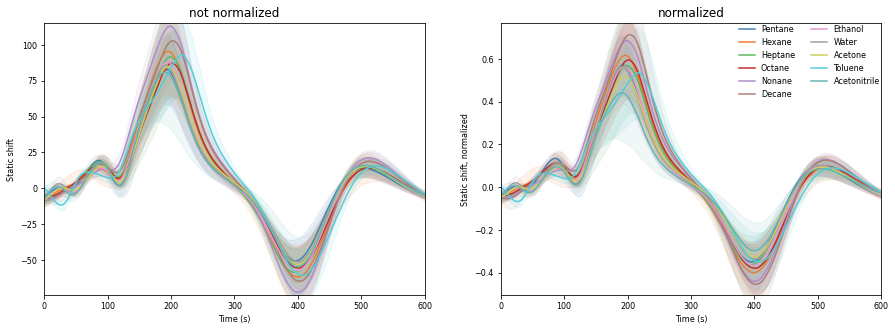

In [ ]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data(PureCompoundsInTallCuvettes(), st1, [0,600], color_dict = color_dict, ax=axes[0])
plot_array_data(PureCompoundsInTallCuvettes(), st2, [0,600], color_dict = color_dict, ax=axes[1])

axes[0].get_legend().remove()

axes[0].set_title('not normalized')
axes[1].set_title('normalized')

axes[0].set_ylabel('Static shift')
axes[1].set_ylabel('Static shift, normalized')

In [ ]:
gas_phase[184].shape

(244,)

In [4]:
from data.datasets import PureCompoundsInTallCuvettes
from data.sniffing_datasets import AlkanesShortSniff
from data.data_functions import DataLoader, PhaseTransform, DerivTransform, NormalizeTransform, NormalizePhaseTransform, SNIFFING_PATH

### Oct 18th Anna Haritosh

In [ ]:
# Sniffing experimtents performed by Anna and Haritosh (before 10/23/22()
from collections import OrderedDict
from data.datasets import Dataset

prefix = "Anna_Haritosh_data"
exp_data = OrderedDict([
    ('Water', ['water_01', 'water_02', 'water_03']),
    ('11:1', ['water_ethanol_11_01_01', 'water_ethanol_11_01_02', 'water_ethanol_11_01_03']),
    ('10:2', ['water_ethanol_10_02_01', 'water_ethanol_10_02_02', 'water_ethanol_10_02_03']),
    ('8:4', ['water_ethanol_08_04_01', 'water_ethanol_08_04_02', 'water_ethanol_08_04_03']),
    ('6:6', ['water_ethanol_06_06_01', 'water_ethanol_06_06_02', 'water_ethanol_06_06_03']),
    ('6:6_deep', ['water_ethanol_06_06_deep_01', 'water_ethanol_06_06_deep_02', 'water_ethanol_06_06_deep_03']),
    ('6:6_shallow', ['water_ethanol_06_06_shallow_01', 'water_ethanol_06_06_shallow_02', 'water_ethanol_06_06_shallow_03']),
    ('4:8', ['water_ethanol_04_08_01', 'water_ethanol_04_08_02', 'water_ethanol_04_08_03']),
    ('4:8_deep', ['water_ethanol_04_08_deep_01', 'water_ethanol_04_08_deep_02', 'water_ethanol_04_08_deep_03']),
    ('4:8_shallow', ['water_ethanol_04_08_shallow_01', 'water_ethanol_04_08_shallow_02', 'water_ethanol_04_08_shallow_03']),
    ('2:10', ['water_ethanol_02_10_01', 'water_ethanol_02_10_02', 'water_ethanol_02_10_03']),
    ('1:11', ['water_ethanol_01_11_01', 'water_ethanol_01_11_02', 'water_ethanol_01_11_03']),
])

ah_data = Dataset(exp_data)

In [ ]:
# # Reformat files
# import pandas as pd

# for _, values in exp_data.items():
#     for value in values:
#         data = pd.read_csv(SNIFFING_PATH.joinpath(prefix, f"original/{value}.csv"), header=1)
#         data.drop(["Recipe Command"], axis=1, inplace=True)
#         data.set_index("Experiment Time (s)", inplace=True)
#         data = data.transpose()
#         data.reset_index().rename(columns={'index': 'Wavelengths'}, inplace=True)
#         data.to_csv(SNIFFING_PATH.joinpath(prefix, f"{value}.csv"))
        

In [74]:
ah_phase, ah_labels = DataLoader(ah_data, transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH.joinpath(prefix)).load()


Loading experimental data
Water (1/12): [===================0] 100% complete
11:1 (2/12): [===================0] 100% complete
10:2 (3/12): [===================0] 100% complete
8:4 (4/12): [===================0] 100% complete
6:6 (5/12): [===================0] 100% complete
6:6_deep (6/12): [===================0] 100% complete
6:6_shallow (7/12): [===================0] 100% complete
4:8 (8/12): [===================0] 100% complete
4:8_deep (9/12): [===================0] 100% complete
4:8_shallow (10/12): [===================0] 100% complete
2:10 (11/12): [===================0] 100% complete
1:11 (12/12): [===================0] 100% complete
Length of experimental set loaded: 36


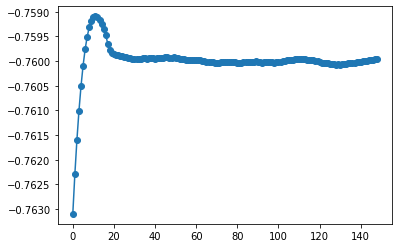

In [73]:
plt.plot(ah_phase['water_03'])
plt.scatter(range(len(ah_phase['water_03'])), ah_phase['water_03'])

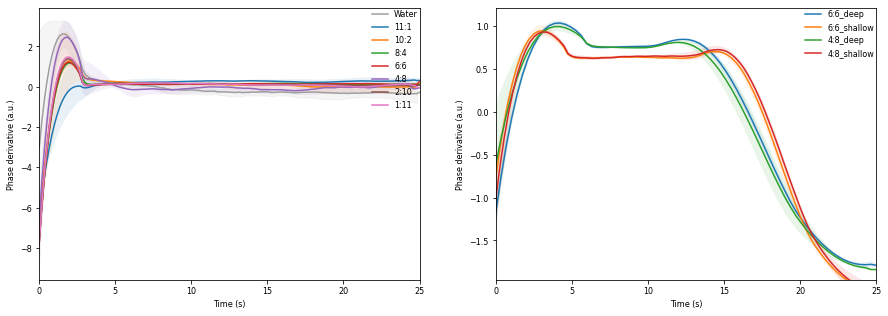

In [75]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data({k:v for k,v in ah_data.items() if not '_' in k}, ah_phase, [0,25], color_dict = color_dict, ax=axes[0])
plot_array_data({k:v for k,v in ah_data.items() if '_' in k}, ah_phase, [0,25], color_dict = color_dict, ax=axes[1])

# axes[0].get_legend().remove()

# axes[0].set_title('not normalized')
# axes[1].set_title('normalized')

# axes[0].set_ylabel('Static shift')
# axes[1].set_ylabel('Static shift, normalized')

### Oct 25th Anna Haritosh

In [1]:
# Sniffing experimtents performed by Anna and Haritosh (before 10/23/22()
from collections import OrderedDict
from data.datasets import Dataset

prefix = "Anna_Haritosh_data"
exp_data = OrderedDict([
    ('Hexane_shallow', ['hexane_shallow_01', 'hexane_shallow_02', 'hexane_shallow_03']),
    ('Hexane_medium', ['hexane_medium_01', 'hexane_medium_02', 'hexane_medium_03']),
    ('Hexane_deep', ['hexane_deep_01', 'hexane_deep_02', 'hexane_deep_03']),
    ('Heptane_shallow', ['heptane_shallow_01', 'heptane_shallow_02', 'heptane_shallow_03']),
    ('Heptane_medium', ['heptane_medium_01', 'heptane_medium_02', 'heptane_medium_03']),
    ('Heptane_deep', ['heptane_deep_01', 'heptane_deep_02', 'heptane_deep_03']),
])

ah_data = Dataset(exp_data)

In [5]:
# # Reformat files
# import pandas as pd

# for _, values in exp_data.items():
#     for value in values:
#         data = pd.read_csv(SNIFFING_PATH.joinpath(prefix, f"original/{value}.csv"), header=1)
#         data.drop(["Recipe Command"], axis=1, inplace=True)
#         data.set_index("Experiment Time (s)", inplace=True)
#         data = data.transpose()
#         data.reset_index().rename(columns={'index': 'Wavelengths'}, inplace=True)
#         data.to_csv(SNIFFING_PATH.joinpath(prefix, f"{value}.csv"))
        

In [6]:
ah_phase, ah_labels = DataLoader(ah_data, transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH.joinpath(prefix)).load()


Loading experimental data
Hexane_shallow (1/6): [===================0] 100% complete
Hexane_medium (2/6): [===================0] 100% complete
Hexane_deep (3/6): [===================0] 100% complete
Heptane_shallow (4/6): [===================0] 100% complete
Heptane_medium (5/6): [===================0] 100% complete
Heptane_deep (6/6): [===================0] 100% complete
Length of experimental set loaded: 18


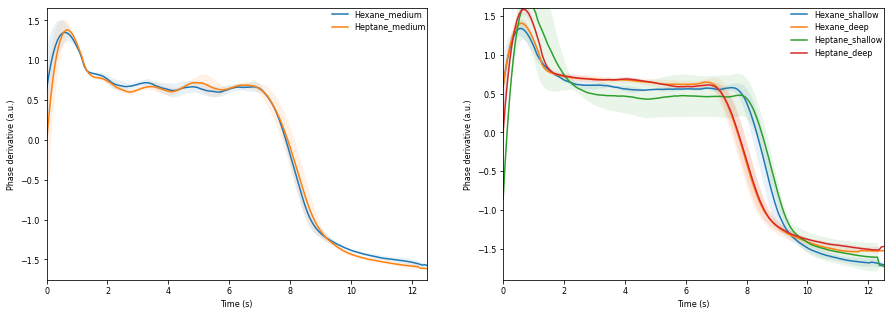

In [14]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data({k:v for k,v in ah_data.items() if 'medium' in k}, ah_phase, [0,12.5], color_dict = color_dict, ax=axes[0])
plot_array_data({k:v for k,v in ah_data.items() if not 'medium' in k}, ah_phase, [0,12.5], color_dict = color_dict, ax=axes[1])

# axes[0].get_legend().remove()

# axes[0].set_title('not normalized')
# axes[1].set_title('normalized')

# axes[0].set_ylabel('Static shift')
# axes[1].set_ylabel('Static shift, normalized')

Loading experimental data
Pentane (1/6): [===================0] 100% complete
Hexane (2/6): [===================0] 100% complete
Heptane (3/6): [===================0] 100% complete
Octane (4/6): [===================0] 100% complete
Nonane (5/6): [===================0] 100% complete
Decane (6/6): [===================0] 100% complete
Length of experimental set loaded: 56


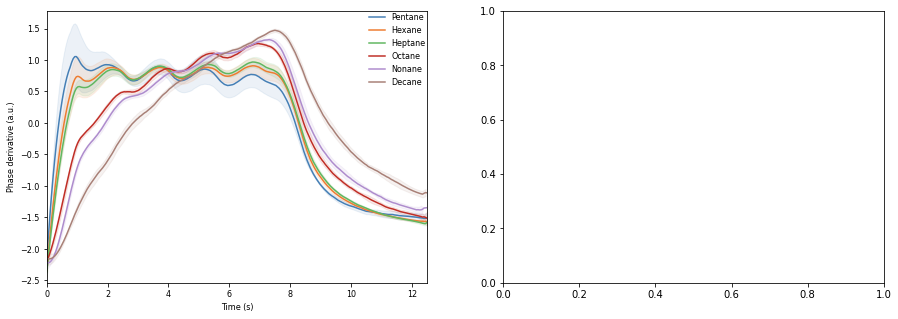

In [16]:
ah_phase, ah_labels = DataLoader(AlkanesShortSniff(), transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH).load()

import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data(AlkanesShortSniff(), ah_phase, [0,12.5], color_dict = color_dict, ax=axes[0])
#plot_array_data({k:v for k,v in ah_data.items() if not 'medium' in k}, ah_phase, [0,12.5], color_dict = color_dict, ax=axes[1])

# axes[0].get_legend().remove()

# axes[0].set_title('not normalized')
# axes[1].set_title('normalized')

# axes[0].set_ylabel('Static shift')
# axes[1].set_ylabel('Static shift, normalized')


### Raw data comparison

In [17]:
# Standard
from collections import OrderedDict

# Third party
import matplotlib.pyplot as plt
import pandas as pd

# Sniffing-sensor
from data.datasets import Dataset, COLOR_DICT as color_dict
from data.sniffing_datasets import AlkanesShortSniff
from data.data_functions import (
        DataLoader,
        PhaseTransform, 
        NormalizePhaseTransform, 
        SNIFFING_PATH,
        RiverTransform,
    )
from data.plot_functions import plot_array_data

##### Original data

In [99]:
gas_img, gas_labels = DataLoader(AlkanesShortSniff(), transforms=[RiverTransform], folder=SNIFFING_PATH).load()
gas_phase, _ = DataLoader(AlkanesShortSniff(), transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH).load()

Loading experimental data
Pentane (1/6): [===================0] 100% complete
Hexane (2/6): [===================0] 100% complete
Heptane (3/6): [===================0] 100% complete
Octane (4/6): [===================0] 100% complete
Nonane (5/6): [===================0] 100% complete
Decane (6/6): [===================0] 100% complete
Length of experimental set loaded: 56
Loading experimental data
Pentane (1/6): [===================0] 100% complete
Hexane (2/6): [===================0] 100% complete
Heptane (3/6): [===================0] 100% complete
Octane (4/6): [===================0] 100% complete
Nonane (5/6): [===================0] 100% complete
Decane (6/6): [===================0] 100% complete
Length of experimental set loaded: 56


##### New data

In [100]:
# Sniffing experimtents performed by Anna and Haritosh (before 10/23/22()

prefix = "Anna_Haritosh_data"
exp_data = OrderedDict([
    ('Hexane_shallow', ['hexane_shallow_01', 'hexane_shallow_02', 'hexane_shallow_03']),
    ('Hexane_medium', ['hexane_medium_01', 'hexane_medium_02', 'hexane_medium_03']),
    ('Hexane_deep', ['hexane_deep_01', 'hexane_deep_02', 'hexane_deep_03']),
    ('Heptane_shallow', ['heptane_shallow_01', 'heptane_shallow_02', 'heptane_shallow_03']),
    ('Heptane_medium', ['heptane_medium_01', 'heptane_medium_02', 'heptane_medium_03']),
    ('Heptane_deep', ['heptane_deep_01', 'heptane_deep_02', 'heptane_deep_03']),
])

ah_data = Dataset(exp_data)
ah_img, ah_labels = DataLoader(ah_data, transforms=[RiverTransform], folder=SNIFFING_PATH.joinpath(prefix)).load()
ah_phase, ah_labels = DataLoader(ah_data, transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH.joinpath(prefix)).load()

Loading experimental data
Hexane_shallow (1/6): [===================0] 100% complete
Hexane_medium (2/6): [===================0] 100% complete
Hexane_deep (3/6): [===================0] 100% complete
Heptane_shallow (4/6): [===================0] 100% complete
Heptane_medium (5/6): [===================0] 100% complete
Heptane_deep (6/6): [===================0] 100% complete
Length of experimental set loaded: 18
Loading experimental data
Hexane_shallow (1/6): [===================0] 100% complete
Hexane_medium (2/6): [===================0] 100% complete
Hexane_deep (3/6): [===================0] 100% complete
Heptane_shallow (4/6): [===================0] 100% complete
Heptane_medium (5/6): [===================0] 100% complete
Heptane_deep (6/6): [===================0] 100% complete
Length of experimental set loaded: 18


### Plot

/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_4931/181297712.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])


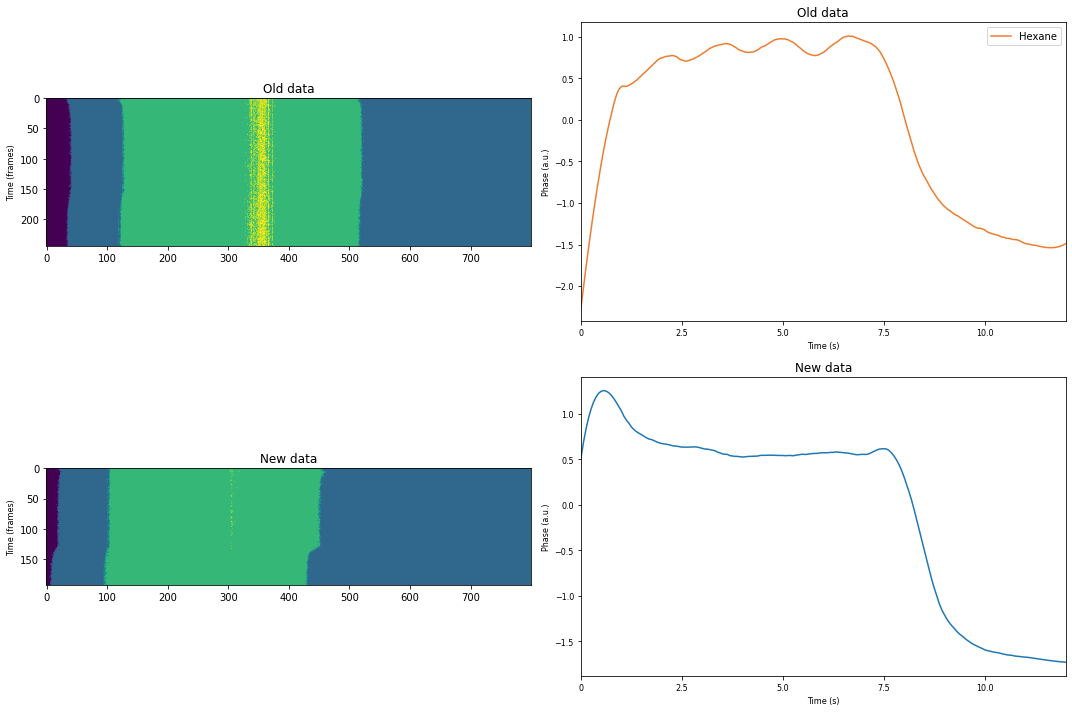

In [102]:
import matplotlib.pyplot as plt

from data.datasets import COLOR_DICT as color_dict

fig, axes = plt.subplots(2,2, figsize=(15,10))

gas_n = 183
axes[0][0].imshow(np.round(gas_img[gas_n], -2))
plot_array_data({"Hexane": [gas_n]}, gas_phase, [0,240], color_dict = color_dict, ax=axes[0][1])
ah_n = 'hexane_shallow_01'
axes[1][0].imshow(np.round(ah_img[ah_n], -2))
plot_array_data({"Hexane_shallow": [ah_n]}, ah_phase, [0,240], color_dict = color_dict, ax=axes[1][1])

for ax in [axes[0][0], axes[0][1]]:
    ax.set_title('Old data')
for ax in [axes[1][0], axes[1][1]]:
    ax.set_title('New data')
for ax in [axes[0][1], axes[1][1]]:
    ax.set_ylabel("Phase (a.u.)", fontsize=labelsize)
    ax.set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])
for ax in [axes[0][0], axes[1][0]]:
    ax.set_ylabel("Time (frames)", fontsize=labelsize)
    #ax.set_yticklabels(["0", "0", "2.5", "5.0","7.5","10.0", "12.5"])
    # ax.set_xticklabels(["0", "2.5", "5.0","7.5","10.0"])
for ax in axes.flatten():
    try:
        ax.get_legend().remove()
    except AttributeError:
        pass
axes[0][1].legend()

plt.tight_layout()

# # A-i: plot phase derivatives
# subset = OrderedDict(exp_set.items()[0:6])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.005], color_dict = color_dict, ax=ax['A1'])
# subset = OrderedDict(exp_set.items()[6:-2] + [exp_set.items()[-1]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = ':', linewidth = 2.5)
# subset = OrderedDict([exp_set.items()[-2]])
# plot_array_data(subset, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A1'], linestyle = '--', linewidth = 2)
# #plot_array_data(exp_set, PD_data, [0,600], ylim=[0,0.007], color_dict = color_dict, ax=ax['A'])
# ax['A1'].legend(loc='upper right', bbox_to_anchor=(1.015, 1.02), ncol=2, frameon=False, shadow=False, fontsize=legendsize*0.9)

/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_4931/4024175015.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(range(300,1250,100))
/var/folders/27/tskcrgv97jvb7fgkqx5pcmtr0000gp/T/ipykernel_4931/4024175015.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(["", "0", "2.5", "5.0","7.5","10.0"])


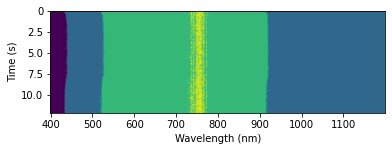

In [111]:
plt.imshow(np.round(gas_img[gas_n], -2))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Time (s)")
plt.gca().set_xticklabels(range(300,1250,100))
plt.gca().set_yticklabels(["", "0", "2.5", "5.0","7.5","10.0"])
#plt.savefig('./Sniffing riverplot.svg', format='svg', dpi=1200)

In [3]:
from data.datasets import PureCompoundsInTallCuvettes

for k,v in PureCompoundsInTallCuvettes().items():
    print(k, len(v))

Pentane 9
Hexane 10
Heptane 3
Octane 8
Nonane 5
Decane 7
Ethanol 7
Water 7
Acetone 8
Toluene 7
Acetonitrile 5
